<h1 align='center'> Predicting Weather using Machine Learning </h1>

<br/>

* Data origin: **OAKLAND INTERNATIONAL AIRPORT, CA US (Station ID: GHCND:USW00023230) - NOAA (National Oceanic Atmospheric Administrasion) [website](https://www.noaa.gov/)**
* Period: **1960-01-01 - 2022-02-26**


> ## Requested Data
____

* The rows bolded below on table are the core columns in our dataset. They are:

1) PRCP - Precipitation;

2) SNWD - Snow depth;

3) TMAX - Maximum temperature;

4) SNOW - Snowfall;

5) TMIN - Minimum temperature;

____


|**Data Code**|**Data Type**|
|:--        |:--          |
|WT03 | Thunder|
|WT04 | Ice pellets, sleet, snow pellets, or small hail"|
|_->**PRCP**_ | _**Precipitation**_|
|WT05 | Hail (may include small hail)|
|WT07 | Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction|
|WT08 | Smoke or haze|
|_->**SNWD**_ | _**Snow depth**_|
|WT09 | Blowing or drifting snow|
|WDF1 | Direction of fastest 1-minute wind|
|WDF2 | Direction of fastest 2-minute wind|
|WDF5 | Direction of fastest 5-second wind|
|PGTM | Peak gust time|
|_->**TMAX**_ | _**Maximum temperature**_|
|FRGT | Top of frozen ground layer|
|DAPR | Number of days included in the multiday precipitation total (MDPR)|
|WSF2 | Fastest 2-minute wind speed|
|FMTM | Time of fastest mile or fastest 1-minute wind|
|ACMH | Average cloudiness midnight to midnight from manual observations|
|WSF5 | Fastest 5-second wind speed|
|_->**SNOW**_ | _**Snowfall**_|
|WDFG | Direction of peak wind gust|
|ACSH | Average cloudiness sunrise to sunset from manual observations|
|WT16 | Rain (may include freezing rain, drizzle, and freezing drizzle)"|
|WT18 | Snow, snow pellets, snow grains, or ice crystals|
|WSF1 | Fastest 1-minute wind speed|
|AWND | Average wind speed|
|WSFG | Peak gust wind speed|
|WT01 | Fog, ice fog, or freezing fog (may include heavy fog)|
|WT02 | Heavy fog or heaving freezing fog (not always distinguished from fog)|
|TAVG | Average Temperature.|
|_->**TMIN**_ | _**Minimum temperature**_|
|MDPR | Multiday precipitation total (use with DAPR and DWPR, if available)|
|TSUN | Total sunshine for the period|

In [1]:
import pandas as pd
weather = pd.read_csv('Datasets/OaklandAirportClimateData.csv', index_col = "DATE")

'''
Using DATE column as index_col because each row is as date, so it gets easier to slice data using DATE column as index or 
even look at any period of time.
'''

weather.tail()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
2022-02-22,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,14.99,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-23,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.28,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,6.71,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.92,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.25,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print(weather.loc['2000-01-01':'2000-01-31',:].head())
print('\n')
print(weather.info()) 
# info() explain in-depth about the dataset and
# the attribute 'shape' could have been used, but it would just give us shallow details

                STATION                                  NAME  ACMH  ACSH  \
DATE                                                                        
2000-01-01  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
2000-01-02  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
2000-01-03  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
2000-01-04  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
2000-01-05  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   

            AWND  DAPR    FMTM  FRGT  MDPR    PGTM  ...  WT01  WT02  WT03  \
DATE                                                ...                     
2000-01-01  8.50   NaN  1643.0   NaN   NaN  1638.0  ...   NaN   NaN   NaN   
2000-01-02  5.37   NaN  1743.0   NaN   NaN  1743.0  ...   NaN   NaN   NaN   
2000-01-03  3.80   NaN   904.0   NaN   NaN   856.0  ...   NaN   NaN   NaN   
2000-01-04  3.80   NaN  1116.0   NaN   NaN  1115.0  ...   NaN   NaN   NaN  

In [3]:
# Finding out columns that have missing values (%)

'''
Using apply function to iterate each column from dataset and
for each column pd.isnull verifies wether there is or not a N/A or NaN or something similar to missing value. 
If there is, counting +1 and at the end dividing by dataset number of rows to get its missing value %
'''

weather.apply(pd.isnull).sum()/weather.shape[0]*100

STATION     0.000000
NAME        0.000000
ACMH       65.397596
ACSH       65.397596
AWND       52.146367
DAPR       99.952632
FMTM       87.032980
FRGT       99.988158
MDPR       99.952632
PGTM       49.606253
PRCP        1.663805
SNOW       32.618864
SNWD       31.884659
TAVG       87.938895
TMAX        0.053289
TMIN        0.059210
TSUN       93.184913
WDF1       65.397596
WDF2       52.140446
WDF5       52.655575
WDFG       74.735035
WSF1       65.397596
WSF2       52.134525
WSF5       52.655575
WSFG       74.735035
WT01       77.956066
WT02       98.010539
WT03       99.295399
WT04       99.976316
WT05       99.834212
WT07       99.988158
WT08       81.034993
WT09       99.988158
WT16       88.424418
WT18       99.982237
dtype: float64

In [4]:
'''
According to core columns, let's create a new dataset containing only these rows
'''
core_weather = weather[['PRCP', "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [5]:
# Renaming columns name to make easier to call them and more intuitive(Actually, it is a matter of preference doing this step)
core_weather.columns = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']

In [6]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-02-22,0.0,NaN,NaN,54.0,40.0
2022-02-23,0.0,NaN,NaN,55.0,36.0
2022-02-24,0.0,NaN,NaN,56.0,33.0


In [7]:
'''
Checking how much (%) missing value core columns have
'''
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]*100

precip         1.663805
snow          32.618864
snow_depth    31.884659
temp_max       0.053289
temp_min       0.059210
dtype: float64

> ### Missing value approach

Let's look at columns data, particularly those with 30%+ of missing value ('snow' and 'snow_depth') and understand how to 
proceed

In [8]:
core_weather['snow'].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [9]:
core_weather['snow_depth'].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [10]:
core_weather['precip'].value_counts().head(10)

0.00    13694
0.01      438
0.02      199
0.03      122
0.04      102
0.05       98
0.06       85
0.07       76
0.08       71
0.10       71
Name: precip, dtype: int64

In [11]:
core_weather['temp_max'].value_counts().head(10)

67.0    833
68.0    830
60.0    824
65.0    810
66.0    808
62.0    757
63.0    755
70.0    751
69.0    741
64.0    721
Name: temp_max, dtype: int64

In [12]:
core_weather['temp_min'].value_counts().head(10)

55.0    1133
56.0    1090
54.0    1041
57.0     978
53.0     970
52.0     935
50.0     913
51.0     889
58.0     770
48.0     733
Name: temp_min, dtype: int64

* We can conclude that the columns 'snow' and 'snow-depth' don't have effective values to training a machine learning algorithm. We can remove both columns from dataset for now. (That's because 'snow' column just has two values '0.0' and '1.0' and '1.0' value has only one register; 'snow_depth' has only 0.0 values)

In [13]:
del core_weather['snow']
del core_weather['snow_depth']

In [14]:
core_weather.head(10)

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.00,49.0,30.0
1960-01-02,0.00,49.0,29.0
1960-01-03,0.00,54.0,35.0
1960-01-04,0.00,54.0,36.0
1960-01-05,0.00,55.0,33.0
1960-01-06,0.00,53.0,38.0
1960-01-07,0.00,56.0,46.0
1960-01-08,0.45,54.0,49.0
1960-01-09,0.61,51.0,46.0


In [15]:
### Checking precipitation missing values
core_weather[pd.isnull(core_weather['precip'])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [16]:

mean_precip = sum(core_weather.loc[~pd.isnull(core_weather['precip']), 'precip'])/len(core_weather.loc[~pd.isnull(core_weather['precip']), 'precip'])

print('Mean of precipitation column (considering only not NaN values):', mean_precip)

Mean of precipitation column (considering only not NaN values): 0.047654142581887826


* To avoid removing entire 'precip' column or these rows with NaN values we can focus on two approaches:

1) **Apply statistics concept;** We can substitute NaN values by mean value or mode value (most frequency value); The mean value is ~=0.047 meanwhile mode is 0.0. Both values are close to each other, but we should be aware that we have 281 rows with NaN value, so if we assume mean value as the substitute, we might be saying that we've gotten days, or weeks or even months with some precipitation (some periods, being consecutive or not).

2) **Incremental sequence;** Thinking about how rain behaves in nature, we may see some patterns on it. Usually, we got some incremental precipitation values during periods of raining, so it starts with 0 precipitation value and on the rainning period it gets increased or just stay stabilized and getting close to the end it gets the precipitation heading 0 again (Day with no rain). So, when facing NaN values, we could get the last recorded value and then measure the distance untill the next recorded value that is different from NaN. Based on this distance, we could keep incrementing values untill reach the halfway there and then start decreasing. The negative point here would be the disruption between the last decreased value and the first real recorded value. Eg the records could be filled with {0.0, 0.1, 0.2, 0.3, 0.4, 0.3, 0.2, 0.1, 0.0} and then the next real value recorded is 1.1;

> The project will use the statistic concept, substituting NaN values by the mode value (0.0) 



In [17]:
core_weather['precip'] = core_weather['precip'].fillna(0)

In [18]:
core_weather[pd.isnull(core_weather['temp_min'])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [19]:
core_weather[pd.isnull(core_weather['temp_max'])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


- **temp_min** and **temp_max** have few rows with NaN value, so using 'propagate last valid observation foward to next valid backfill (ffill argument)' will handle it.

In [20]:
'''
Using .fillna() with argument method = 'ffill' =>
propagate last valid observation forward to next valid backfill.
'''
core_weather = core_weather.fillna(method = 'ffill')

In [21]:
'''
Checking how much (%) missing value core columns still have
'''
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]*100

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [22]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [23]:
### Converting indexes to Datetime object
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-26'],
              dtype='datetime64[ns]', name='DATE', length=16889, freq=None)

In [24]:
core_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=16889)

In [25]:
'''
lambda arguments: expression
Using lambda function to iterate each row and counting everytime a 9999 value is hit.
Doing this just to make sure that there is no value using 9999 as missing value.
'''
core_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

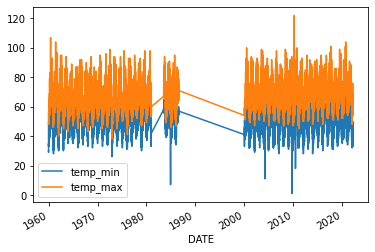

In [26]:
### Plotting temp_max and temp_min
core_weather[['temp_min', 'temp_max']].plot()

In [27]:
'''
Sorting by descending way to check which years has less than 365 || 366 values(365-366 days/year)

obs: There are some years missing though. 'core_weather.index.year.value_counts().sort_index()' 
would show which ones are those missing years.

'''
core_weather.index.year.value_counts().sort_values(ascending = True)

2022     57
1983    184
1986    212
2019    365
2018    365
2012    365
2002    365
1970    365
1978    365
1971    365
1973    365
1974    365
1975    365
1967    365
1979    365
2001    365
1966    365
2021    365
1965    365
1985    365
1961    365
2000    365
2017    365
1977    365
1962    365
2014    365
2013    365
2003    365
1969    365
2010    365
2009    365
1963    365
2007    365
2006    365
2005    365
2011    365
2015    365
1972    366
2016    366
2008    366
2004    366
1968    366
1980    366
1976    366
1984    366
1964    366
2020    366
1960    366
Name: DATE, dtype: int64

In [28]:
'''
Missing years
'''
print(core_weather.index.year.value_counts().sort_index())
print('\n')
print('Missing years: {81, 82, 87-99}')

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022     57
Name: DATE, dtype: int64


Missing years: {81, 82, 87-99}


<AxesSubplot:xlabel='DATE'>

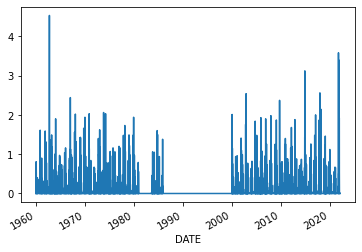

In [29]:
### Plotting precipitation
core_weather['precip'].plot()

- Plotting data helps to see if there is something wrong with it. There are some gaps in data, but they don't get in the way too much.

In [44]:
### Rain precipitation each year

'''
obs: Here we could use groupby() to analysis which year had the most rain precipitation or even month.
'''

core_weather['precip'].groupby(core_weather.index.year).sum()


DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: precip, dtype: float64

In [31]:
'''
shift(-1) makes the target column receives n_temp_max +1. E.g target from index 1960-01-01 
will receive temp_max from 1960-01-02 and so on
'''
core_weather['target'] = core_weather['temp_max'].shift(-1)
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-02-22,0.0,54.0,40.0,55.0
2022-02-23,0.0,55.0,36.0,56.0
2022-02-24,0.0,56.0,33.0,59.0


In [32]:
### Removing last index because shift(-1) couldn't get a value to this row because the next index/value doesn't exist
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-02-21,0.0,58.0,40.0,54.0
2022-02-22,0.0,54.0,40.0,55.0
2022-02-23,0.0,55.0,36.0,56.0


In [33]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

- sklearn - linear model - Ridge Regression [documentation](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

In [34]:
### Variables to use to predict values
predictors = ['precip', 'temp_max', 'temp_min']

In [35]:
### trainning set
train = core_weather.loc[:'2020-12-31']
### testing set
test = core_weather.loc['2021-01-01':]

print(train.shape)
print(test.shape)
print(len(core_weather))

(16467, 4)
(421, 4)
16888


- Using .loc or .iloc [view use](https://towardsdatascience.com/how-to-use-loc-and-iloc-for-selecting-data-in-pandas-bd09cb4c3d79?gi=4caeb1a400b4)

In [36]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [37]:
predictions = reg.predict(test[predictors])

In [38]:
from sklearn.metrics import mean_absolute_error

### mean_absolute_error

- **What is mean absolute error(MAE)?**

Absolute Error is the amount of error in your measurements. It is the difference between the measured value and “true” value. So, mean absolute error is the mean of absolute error value.

__*E.g*__ 

y_true = {3, -0.5, 2, 7}

y_pred = {2.5, 0.0, 2, 8}

absolute_error = | 3 - 2.5 | + | -0.5 - 0.0 | + | 2 - 2 | + | 7 - 8 | = 0.5 + 0.5 + 0 + 1 
mean_absolute_error = (0.5+0.5+0+1)/n = 2/4 = 0.5

In [39]:
mean_absolute_error(test['target'], predictions)

3.3934788655920514

- In average approximately 3.39 degrees off at first attempt/first training

In [40]:
type(predictions)

numpy.ndarray

In [41]:
combined = pd.concat([test['target'], pd.Series(predictions, index = test.index)], axis = 1)
list(combined)
combined.rename(columns = {0: 'predicted'}, inplace = True)
combined

,target,predicted
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-02-21,54.0,58.363747
2022-02-22,55.0,55.479194
2022-02-23,56.0,55.481570


<AxesSubplot:xlabel='DATE'>

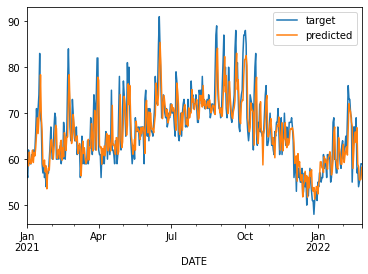

In [42]:
combined.plot()

In [43]:
'''
df.loc[:, df.columns!='rebounds']
'''
print('Looking which column is used most to train the model')
print('\n')
print(list(core_weather.columns[core_weather.columns != 'target']) )
print(reg.coef_)

Looking which column is used most to train the model


['precip', 'temp_max', 'temp_min']
[-2.20730384  0.72113834  0.17969047]


- Defining a function to predict every time it's necessary

In [73]:
def create_predict(predictors, core_weather, reg):
    ### trainning set
    train = core_weather.loc[:'2020-12-31']
    ### testing set
    test = core_weather.loc['2021-01-01':]
    ### fitting model
    reg.fit(train[predictors], train['target'])
    ### predicting values
    predictions = reg.predict(test[predictors])
    ### predictions error
    error = mean_absolute_error(test['target'], predictions)
    ### combining predictions and targets
    combined = pd.concat([test['target'], pd.Series(predictions, index = test.index)], axis = 1)
    ### renaming columns
    combined.columns = ['target', 'predicted']
    ### returning error and combined columns
    return error, combined

- Using rolling window to figure out the average of 'temp_max' on period of 30 days (a month).

rolling window explanation: [rolling window](https://robotwealth.com/rolling-and-expanding-windows-for-dummies/)

rolling function documentation: [pandas rolling function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)

In [68]:
### Using min_periods argument == 1 to avoid NaN on the 29 first rows
core_weather['month_max'] = core_weather['temp_max'].rolling(30, min_periods = 1).mean()
core_weather.loc['2022-01-25':'2022-02-25',]

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
2022-01-25,0.0,57.0,43.0,57.0,57.233333
2022-01-26,0.0,57.0,41.0,67.0,57.433333
2022-01-27,0.0,67.0,39.0,64.0,58.066667
2022-01-28,0.0,64.0,39.0,62.0,58.500000
2022-01-29,0.0,62.0,39.0,59.0,58.833333
2022-01-30,0.0,59.0,39.0,58.0,59.033333
2022-01-31,0.0,58.0,43.0,63.0,59.266667
2022-02-01,0.0,63.0,39.0,64.0,59.533333
2022-02-02,0.0,64.0,43.0,60.0,59.866667


In [70]:
core_weather['month_day_max'] = core_weather['month_max']/core_weather['temp_max']
core_weather.head(10)

,precip,temp_max,temp_min,target,month_max,month_day_max
DATE,,,,,,
1960-01-01,0.00,49.0,30.0,49.0,49.000000,1.000000
1960-01-02,0.00,49.0,29.0,54.0,49.000000,1.000000
1960-01-03,0.00,54.0,35.0,54.0,50.666667,0.938272
1960-01-04,0.00,54.0,36.0,55.0,51.500000,0.953704
1960-01-05,0.00,55.0,33.0,53.0,52.200000,0.949091
1960-01-06,0.00,53.0,38.0,56.0,52.333333,0.987421
1960-01-07,0.00,56.0,46.0,54.0,52.857143,0.943878
1960-01-08,0.45,54.0,49.0,51.0,53.000000,0.981481
1960-01-09,0.61,51.0,46.0,55.0,52.777778,1.034858


In [71]:
core_weather['max_min'] = core_weather['temp_max']/core_weather['temp_min']
core_weather.head(10)

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,
1960-01-01,0.00,49.0,30.0,49.0,49.000000,1.000000,1.633333
1960-01-02,0.00,49.0,29.0,54.0,49.000000,1.000000,1.689655
1960-01-03,0.00,54.0,35.0,54.0,50.666667,0.938272,1.542857
1960-01-04,0.00,54.0,36.0,55.0,51.500000,0.953704,1.500000
1960-01-05,0.00,55.0,33.0,53.0,52.200000,0.949091,1.666667
1960-01-06,0.00,53.0,38.0,56.0,52.333333,0.987421,1.394737
1960-01-07,0.00,56.0,46.0,54.0,52.857143,0.943878,1.217391
1960-01-08,0.45,54.0,49.0,51.0,53.000000,0.981481,1.102041
1960-01-09,0.61,51.0,46.0,55.0,52.777778,1.034858,1.108696


In [72]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']

In [74]:
error, combined = create_predict(predictors, core_weather, reg)

In [75]:
error

3.3438762563891813

<AxesSubplot:xlabel='DATE'>

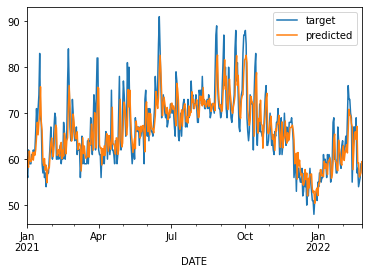

In [77]:
combined.plot()

In [82]:
core_weather['monthly_avg'] = core_weather['temp_max'].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
core_weather.head(10)

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-01,0.00,49.0,30.0,49.0,49.000000,1.000000,1.633333,49.000000
1960-01-02,0.00,49.0,29.0,54.0,49.000000,1.000000,1.689655,49.000000
1960-01-03,0.00,54.0,35.0,54.0,50.666667,0.938272,1.542857,50.666667
1960-01-04,0.00,54.0,36.0,55.0,51.500000,0.953704,1.500000,51.500000
1960-01-05,0.00,55.0,33.0,53.0,52.200000,0.949091,1.666667,52.200000
1960-01-06,0.00,53.0,38.0,56.0,52.333333,0.987421,1.394737,52.333333
1960-01-07,0.00,56.0,46.0,54.0,52.857143,0.943878,1.217391,52.857143
1960-01-08,0.45,54.0,49.0,51.0,53.000000,0.981481,1.102041,53.000000
1960-01-09,0.61,51.0,46.0,55.0,52.777778,1.034858,1.108696,52.777778


In [85]:
core_weather['day_of_year_avg'] = core_weather['temp_max'].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())
core_weather.head(10)

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-01-01,0.00,49.0,30.0,49.0,49.000000,1.000000,1.633333,49.000000,49.0
1960-01-02,0.00,49.0,29.0,54.0,49.000000,1.000000,1.689655,49.000000,49.0
1960-01-03,0.00,54.0,35.0,54.0,50.666667,0.938272,1.542857,50.666667,54.0
1960-01-04,0.00,54.0,36.0,55.0,51.500000,0.953704,1.500000,51.500000,54.0
1960-01-05,0.00,55.0,33.0,53.0,52.200000,0.949091,1.666667,52.200000,55.0
1960-01-06,0.00,53.0,38.0,56.0,52.333333,0.987421,1.394737,52.333333,53.0
1960-01-07,0.00,56.0,46.0,54.0,52.857143,0.943878,1.217391,52.857143,56.0
1960-01-08,0.45,54.0,49.0,51.0,53.000000,0.981481,1.102041,53.000000,54.0
1960-01-09,0.61,51.0,46.0,55.0,52.777778,1.034858,1.108696,52.777778,51.0


In [86]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min', 'monthly_avg', 'day_of_year_avg']

In [87]:
error, combined = create_predict(predictors, core_weather, reg)

In [88]:
error

3.308424470472975

<AxesSubplot:xlabel='DATE'>

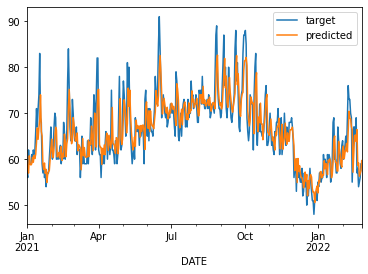

In [89]:
combined.plot()

In [92]:
print(list(core_weather.columns[core_weather.columns != 'target']) )
print('\n')
print(reg.coef_)

['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min', 'monthly_avg', 'day_of_year_avg']


[ -0.90378699   0.40110432   0.03126329   0.33664725 -15.99399325
   0.04948331   0.1427731    0.08075229]


In [94]:
core_weather.corr()['target']

precip            -0.205410
temp_max           0.822018
temp_min           0.596557
target             1.000000
month_max          0.687463
month_day_max     -0.419869
max_min            0.044911
monthly_avg        0.690396
day_of_year_avg    0.712778
Name: target, dtype: float64

In [96]:
combined['diff'] = (combined['target'] - combined['predicted']).abs()

In [97]:
combined.sort_values('diff', ascending = False).head()

,target,predicted,diff
DATE,,,
2021-01-17,83.0,68.576955,14.423045
2021-05-07,81.0,67.775914,13.224086
2021-04-01,62.0,75.177405,13.177405
2021-02-22,84.0,71.170984,12.829016
2021-10-16,66.0,78.820275,12.820275


- Trying to predict without negative correlation with target column

In [98]:
predictors = ['temp_max', 'temp_min', 'month_max', 'max_min', 'monthly_avg', 'day_of_year_avg']

In [99]:
error, combined = create_predict(predictors, core_weather, reg)

In [101]:
error

3.326281140633387

Even trying to take off negative correlations with the target column, the error raises

In [102]:
core_weather['max_min_difference'] = core_weather['temp_max']-core_weather['temp_min']
core_weather.head(10)

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg,max_min_difference
DATE,,,,,,,,,,
1960-01-01,0.00,49.0,30.0,49.0,49.000000,1.000000,1.633333,49.000000,49.0,19.0
1960-01-02,0.00,49.0,29.0,54.0,49.000000,1.000000,1.689655,49.000000,49.0,20.0
1960-01-03,0.00,54.0,35.0,54.0,50.666667,0.938272,1.542857,50.666667,54.0,19.0
1960-01-04,0.00,54.0,36.0,55.0,51.500000,0.953704,1.500000,51.500000,54.0,18.0
1960-01-05,0.00,55.0,33.0,53.0,52.200000,0.949091,1.666667,52.200000,55.0,22.0
1960-01-06,0.00,53.0,38.0,56.0,52.333333,0.987421,1.394737,52.333333,53.0,15.0
1960-01-07,0.00,56.0,46.0,54.0,52.857143,0.943878,1.217391,52.857143,56.0,10.0
1960-01-08,0.45,54.0,49.0,51.0,53.000000,0.981481,1.102041,53.000000,54.0,5.0
1960-01-09,0.61,51.0,46.0,55.0,52.777778,1.034858,1.108696,52.777778,51.0,5.0


,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg,max_min_difference
DATE,,,,,,,,,,
1960-01-01,0.00,49.0,30.0,49.0,49.000000,1.000000,1.633333,49.000000,49.0,19.0
1960-01-02,0.00,49.0,29.0,54.0,49.000000,1.000000,1.689655,49.000000,49.0,20.0
1960-01-03,0.00,54.0,35.0,54.0,50.666667,0.938272,1.542857,50.666667,54.0,19.0
1960-01-04,0.00,54.0,36.0,55.0,51.500000,0.953704,1.500000,51.500000,54.0,18.0
1960-01-05,0.00,55.0,33.0,53.0,52.200000,0.949091,1.666667,52.200000,55.0,22.0
1960-01-06,0.00,53.0,38.0,56.0,52.333333,0.987421,1.394737,52.333333,53.0,15.0
1960-01-07,0.00,56.0,46.0,54.0,52.857143,0.943878,1.217391,52.857143,56.0,10.0
1960-01-08,0.45,54.0,49.0,51.0,53.000000,0.981481,1.102041,53.000000,54.0,5.0
1960-01-09,0.61,51.0,46.0,55.0,52.777778,1.034858,1.108696,52.777778,51.0,5.0


In [109]:
predictors = ['precip', 
              'temp_max', 
              'temp_min', 
              'month_max', 
              'month_day_max', 
              'max_min', 
              'monthly_avg', 
              'day_of_year_avg', 
              'max_min_difference']

In [110]:
error, combined = create_predict(predictors, core_weather, reg)

In [111]:
error

3.3084244272872834

<AxesSubplot:xlabel='DATE'>

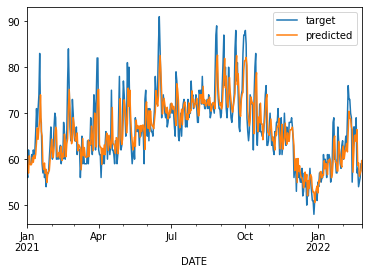

In [112]:
combined.plot()

* Top 10 diff predicted values below:

In [117]:
combined['diff']=(combined['target']-combined['predicted']).abs()
combined.sort_values('diff', ascending=False).head(10)

,target,predicted,diff
DATE,,,
2021-01-17,83.0,68.576956,14.423044
2021-05-07,81.0,67.775913,13.224087
2021-04-01,62.0,75.177407,13.177407
2021-02-22,84.0,71.170985,12.829015
2021-10-16,66.0,78.820276,12.820276
2021-02-21,77.0,64.417737,12.582263
2021-03-30,82.0,70.107007,11.892993
2021-06-16,91.0,79.113829,11.886171
2021-07-07,79.0,67.319290,11.680710


* core_weather columns and relativity to the prediction model

In [119]:
print(list(core_weather.columns[core_weather.columns != 'target']) )
print('\n')
print(reg.coef_)

['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min', 'monthly_avg', 'day_of_year_avg', 'max_min_difference']


[ -0.90378701   0.27782444   0.15454385   0.33664653 -15.99394518
   0.04948324   0.14277313   0.08075228   0.12328058]


* Correlation between target column and core_weather columns

In [120]:
core_weather.corr()['target']

precip               -0.205410
temp_max              0.822018
temp_min              0.596557
target                1.000000
month_max             0.687463
month_day_max        -0.419869
max_min               0.044911
monthly_avg           0.690396
day_of_year_avg       0.712778
max_min_difference    0.427067
Name: target, dtype: float64

### Possibilities to improve prediction

* Use temp_min to create new predictors;
* Use other attributes/columns from the original dataset to predict values;
* Find other data source(s) to enhance the current data;
* Fill gaps in current data;
* Choose other machine learning models and test your results;